✅ Step 1: Load the Three Datasets

In [ ]:
import pandas as pd

# Load the datasets
df_raw = pd.read_csv("cleaned_diabetes_data.csv")  
df_under = pd.read_csv("undersampling_diabetes_data.csv")  
df_over = pd.read_csv("oversampling_diabetes_data.csv")  

# Check data
print("Raw Data Shape:", df_raw.shape)
print("Under-sampled Data Shape:", df_under.shape)
print("Over-sampled Data Shape:", df_over.shape)


Raw Data Shape: (14618, 11)
Under-sampled Data Shape: (9236, 11)
Over-sampled Data Shape: (20000, 11)


✅ Step 2: Split Data into Train, Validation, and Test Sets

In [2]:
from sklearn.model_selection import train_test_split

def split_data(df):
    X = df.drop('diabetes', axis=1)  # Features
    y = df['diabetes']  # Target variable
    
    # Split into Train (80%) and Test (20%)
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

    # Further split Train into Training (70%) and Validation (30%)
    X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.3, random_state=42)
    
    return X_train, X_val, X_test, y_train, y_val, y_test

# Split each dataset
X_train_raw, X_val_raw, X_test_raw, y_train_raw, y_val_raw, y_test_raw = split_data(df_raw)
X_train_under, X_val_under, X_test_under, y_train_under, y_val_under, y_test_under = split_data(df_under)
X_train_over, X_val_over, X_test_over, y_train_over, y_val_over, y_test_over = split_data(df_over)


In [3]:
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score

# Function to train and evaluate models
def train_models(models, X_train, y_train, X_val, y_val, sampling_type):
    print(f"\n📌 Training models on {sampling_type} data...\n")
    results = {}

    for name, model in models.items():
        print(f"🔍 Training {name}...\n")
        model.fit(X_train, y_train)
        
        # Validate model
        y_val_pred = model.predict(X_val)
        val_acc = accuracy_score(y_val, y_val_pred)
        print(f"✅ {name} Validation Accuracy: {val_acc:.4f}\n")
        
        results[name] = {
            "Model": model,
            "Validation Accuracy": val_acc
        }
    
    return results

# Define models
models_to_train = {
    "Logistic Regression": LogisticRegression(),
    "SVM": SVC(),
    "Random Forest": RandomForestClassifier()
}

# Train models on each dataset
results_raw_initial = train_models(models_to_train, X_train_raw, y_train_raw, X_val_raw, y_val_raw, "Raw Data")
results_under_initial = train_models(models_to_train, X_train_under, y_train_under, X_val_under, y_val_under, "Under-sampled Data")
results_over_initial = train_models(models_to_train, X_train_over, y_train_over, X_val_over, y_val_over, "Over-sampled Data")


📌 Training models on Raw Data data...

🔍 Training Logistic Regression...

✅ Logistic Regression Validation Accuracy: 0.8250

🔍 Training SVM...



C:\Users\ASUS\AppData\Roaming\Python\Python312\site-packages\sklearn\linear_model\_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


✅ SVM Validation Accuracy: 0.8279

🔍 Training Random Forest...

✅ Random Forest Validation Accuracy: 0.8826


📌 Training models on Under-sampled Data data...

🔍 Training Logistic Regression...

✅ Logistic Regression Validation Accuracy: 0.8593

🔍 Training SVM...



C:\Users\ASUS\AppData\Roaming\Python\Python312\site-packages\sklearn\linear_model\_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


✅ SVM Validation Accuracy: 0.8006

🔍 Training Random Forest...

✅ Random Forest Validation Accuracy: 0.8845


📌 Training models on Over-sampled Data data...

🔍 Training Logistic Regression...

✅ Logistic Regression Validation Accuracy: 0.8673

🔍 Training SVM...



C:\Users\ASUS\AppData\Roaming\Python\Python312\site-packages\sklearn\linear_model\_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


✅ SVM Validation Accuracy: 0.8187

🔍 Training Random Forest...

✅ Random Forest Validation Accuracy: 0.8985



✅ Step 3: Train Models with Hyperparameter Tuning

In [ ]:
from sklearn.calibration import LinearSVC
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import GridSearchCV

# Define models and hyperparameters
models = {
    "Logistic Regression": (LogisticRegression(), {
        "C": [0.01, 0.1, 1, 10, 100],
        "solver": ["liblinear", "lbfgs"]
    }),
    
    # "SVM": (SVC(), {
    #     "C": [0.1, 1, 10, 100],
    #     "kernel": ["linear", "rbf", "poly"],
    #     "gamma": ["scale", "auto", 0.1, 1]
    # }),
    
    "SVM": (LinearSVC(), {
    "C": [0.1, 1, 10]  
}),
    "Random Forest": (RandomForestClassifier(), {
        "n_estimators": [50, 100, 200],
        "max_depth": [None, 10, 20]
    }),
    "Gradient Boosting": (GradientBoostingClassifier(), {
        "n_estimators": [50, 100, 200],
        "learning_rate": [0.01, 0.1, 0.2]
    }),
    "KNN": (KNeighborsClassifier(), {
        "n_neighbors": [3, 5, 7],
        "weights": ["uniform", "distance"]
    })
}

# Function to train models with hyperparameter tuning
def train_and_tune(models, X_train, X_val, y_train, y_val, sampling_type):
    print(f"\n📌 Training models on {sampling_type} data...\n")
    results = {}

    for name, (model, params) in models.items():
        print(f"\n🔍 Training {name} with GridSearchCV...\n")
        
        grid_search = GridSearchCV(model, param_grid=params, cv=5, scoring='accuracy', n_jobs=-1)
        grid_search.fit(X_train, y_train)
        
        # Best model from tuning
        best_model = grid_search.best_estimator_
        
        # Validate model
        val_acc = best_model.score(X_val, y_val)
        print(f"✅ Best Accuracy: {val_acc:.4f}")
        
        results[name] = {
            "Best Model": best_model,
            "Best Params": grid_search.best_params_,
            "Validation Accuracy": val_acc
        }
    
    return results

# Train models on each dataset
results_raw = train_and_tune(models, X_train_raw, X_val_raw, y_train_raw, y_val_raw, "Raw Data")
results_under = train_and_tune(models, X_train_under, X_val_under, y_train_under, y_val_under, "Under-sampled Data")
results_over = train_and_tune(models, X_train_over, X_val_over, y_train_over, y_val_over, "Over-sampled Data")



📌 Training models on Raw Data data...


🔍 Training Logistic Regression with GridSearchCV...

✅ Best Accuracy: 0.8632

🔍 Training SVM with GridSearchCV...

✅ Best Accuracy: 0.8635

🔍 Training Random Forest with GridSearchCV...

✅ Best Accuracy: 0.8849

🔍 Training Gradient Boosting with GridSearchCV...

✅ Best Accuracy: 0.8923

🔍 Training KNN with GridSearchCV...

✅ Best Accuracy: 0.8333

📌 Training models on Under-sampled Data data...


🔍 Training Logistic Regression with GridSearchCV...

✅ Best Accuracy: 0.8579

🔍 Training SVM with GridSearchCV...

✅ Best Accuracy: 0.8602

🔍 Training Random Forest with GridSearchCV...

✅ Best Accuracy: 0.8841

🔍 Training Gradient Boosting with GridSearchCV...

✅ Best Accuracy: 0.8922

🔍 Training KNN with GridSearchCV...

✅ Best Accuracy: 0.8205

📌 Training models on Over-sampled Data data...


🔍 Training Logistic Regression with GridSearchCV...

✅ Best Accuracy: 0.8715

🔍 Training SVM with GridSearchCV...

✅ Best Accuracy: 0.8712

🔍 Training Random Fo

✅ Step 4: Evaluate on Test Data and Compare Performance


📌 Evaluating models on Raw Data test data...


🔍 Logistic Regression - Test Accuracy: 0.8601

              precision    recall  f1-score   support

           0       0.88      0.92      0.90      1983
           1       0.82      0.73      0.77       941

    accuracy                           0.86      2924
   macro avg       0.85      0.83      0.83      2924
weighted avg       0.86      0.86      0.86      2924



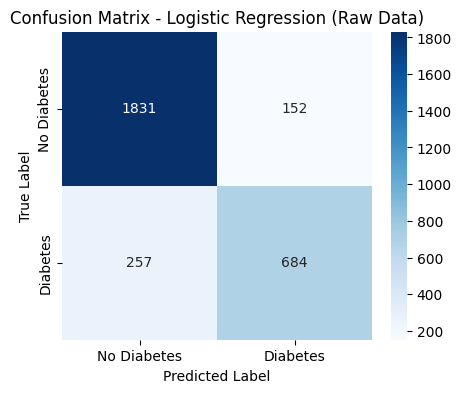


🔍 SVM - Test Accuracy: 0.8608

              precision    recall  f1-score   support

           0       0.88      0.92      0.90      1983
           1       0.82      0.73      0.77       941

    accuracy                           0.86      2924
   macro avg       0.85      0.83      0.84      2924
weighted avg       0.86      0.86      0.86      2924



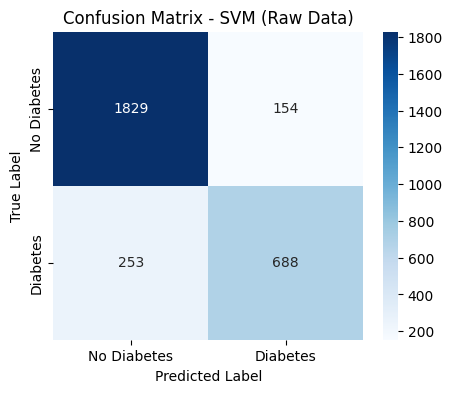


🔍 Random Forest - Test Accuracy: 0.8889

              precision    recall  f1-score   support

           0       0.91      0.92      0.92      1983
           1       0.84      0.81      0.82       941

    accuracy                           0.89      2924
   macro avg       0.87      0.87      0.87      2924
weighted avg       0.89      0.89      0.89      2924



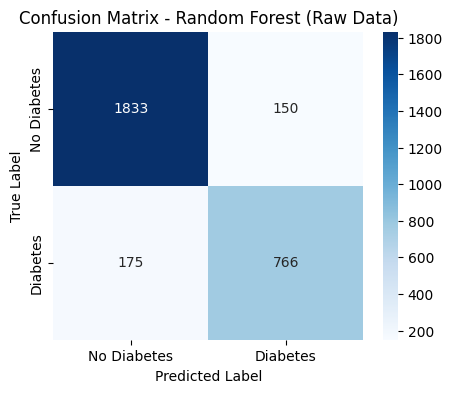


🔍 Gradient Boosting - Test Accuracy: 0.8974

              precision    recall  f1-score   support

           0       0.92      0.93      0.92      1983
           1       0.85      0.83      0.84       941

    accuracy                           0.90      2924
   macro avg       0.88      0.88      0.88      2924
weighted avg       0.90      0.90      0.90      2924



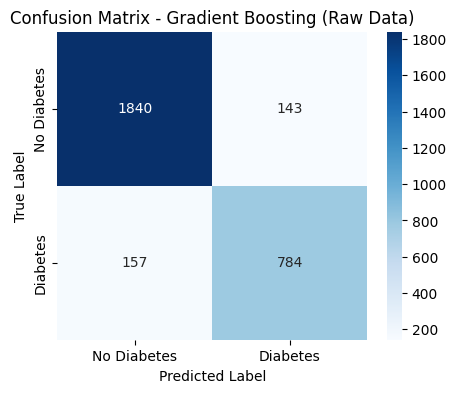


🔍 KNN - Test Accuracy: 0.8358

              precision    recall  f1-score   support

           0       0.87      0.89      0.88      1983
           1       0.76      0.72      0.74       941

    accuracy                           0.84      2924
   macro avg       0.81      0.80      0.81      2924
weighted avg       0.83      0.84      0.83      2924



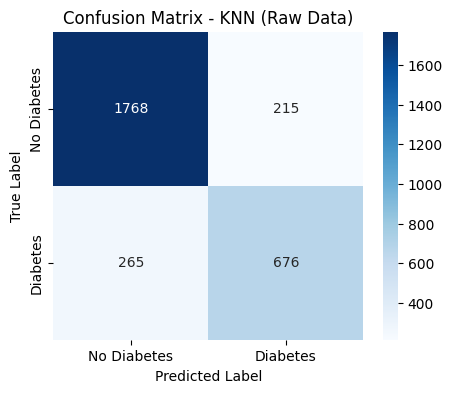


📌 Evaluating models on Under-sampled Data test data...


🔍 Logistic Regression - Test Accuracy: 0.8539

              precision    recall  f1-score   support

           0       0.86      0.84      0.85       909
           1       0.85      0.87      0.86       939

    accuracy                           0.85      1848
   macro avg       0.85      0.85      0.85      1848
weighted avg       0.85      0.85      0.85      1848



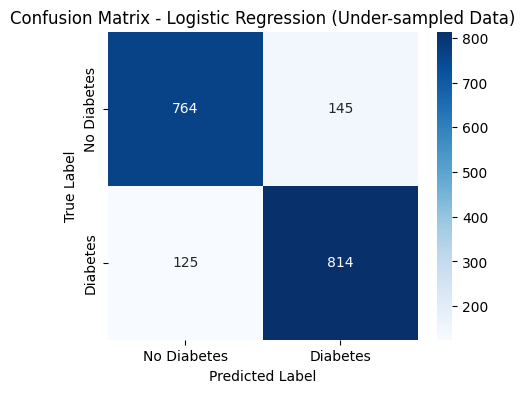


🔍 SVM - Test Accuracy: 0.8555

              precision    recall  f1-score   support

           0       0.86      0.84      0.85       909
           1       0.85      0.87      0.86       939

    accuracy                           0.86      1848
   macro avg       0.86      0.86      0.86      1848
weighted avg       0.86      0.86      0.86      1848



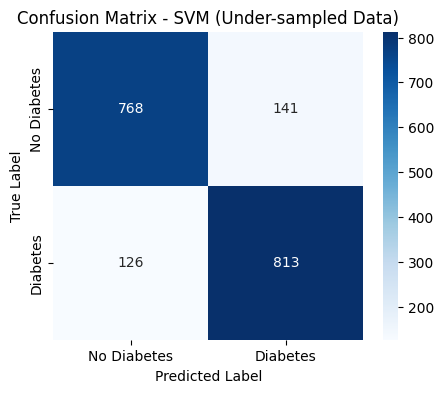


🔍 Random Forest - Test Accuracy: 0.8842

              precision    recall  f1-score   support

           0       0.92      0.84      0.88       909
           1       0.86      0.93      0.89       939

    accuracy                           0.88      1848
   macro avg       0.89      0.88      0.88      1848
weighted avg       0.89      0.88      0.88      1848



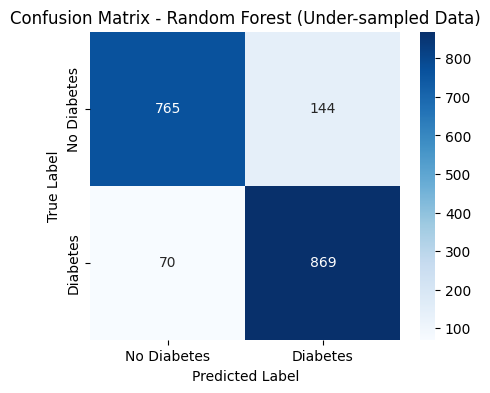


🔍 Gradient Boosting - Test Accuracy: 0.8918

              precision    recall  f1-score   support

           0       0.92      0.85      0.89       909
           1       0.87      0.93      0.90       939

    accuracy                           0.89      1848
   macro avg       0.89      0.89      0.89      1848
weighted avg       0.89      0.89      0.89      1848



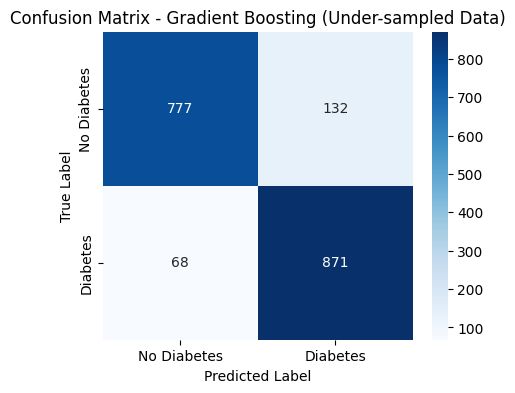


🔍 KNN - Test Accuracy: 0.8171

              precision    recall  f1-score   support

           0       0.83      0.78      0.81       909
           1       0.80      0.85      0.83       939

    accuracy                           0.82      1848
   macro avg       0.82      0.82      0.82      1848
weighted avg       0.82      0.82      0.82      1848



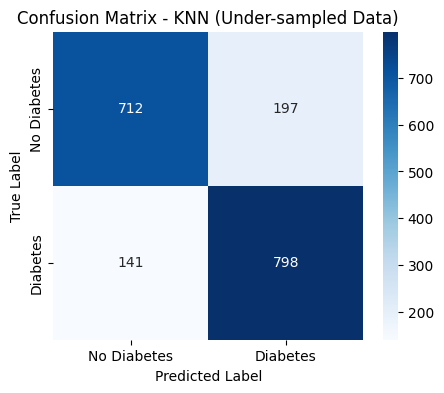


📌 Evaluating models on Over-sampled Data test data...


🔍 Logistic Regression - Test Accuracy: 0.8730

              precision    recall  f1-score   support

           0       0.88      0.86      0.87      2029
           1       0.86      0.88      0.87      1971

    accuracy                           0.87      4000
   macro avg       0.87      0.87      0.87      4000
weighted avg       0.87      0.87      0.87      4000



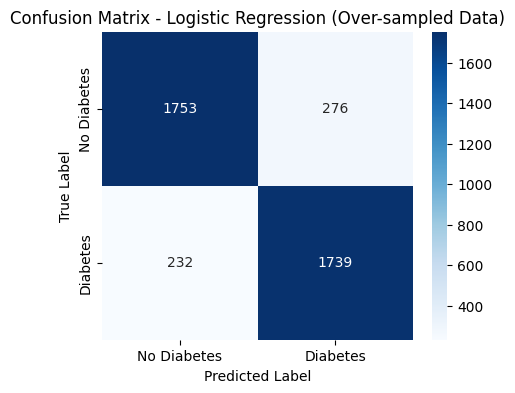


🔍 SVM - Test Accuracy: 0.8735

              precision    recall  f1-score   support

           0       0.89      0.86      0.87      2029
           1       0.86      0.89      0.87      1971

    accuracy                           0.87      4000
   macro avg       0.87      0.87      0.87      4000
weighted avg       0.87      0.87      0.87      4000



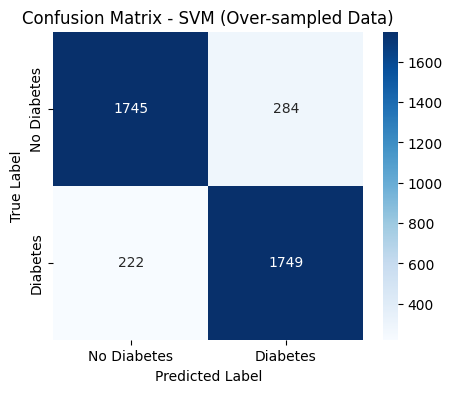


🔍 Random Forest - Test Accuracy: 0.9035

              precision    recall  f1-score   support

           0       0.93      0.88      0.90      2029
           1       0.88      0.93      0.90      1971

    accuracy                           0.90      4000
   macro avg       0.90      0.90      0.90      4000
weighted avg       0.90      0.90      0.90      4000



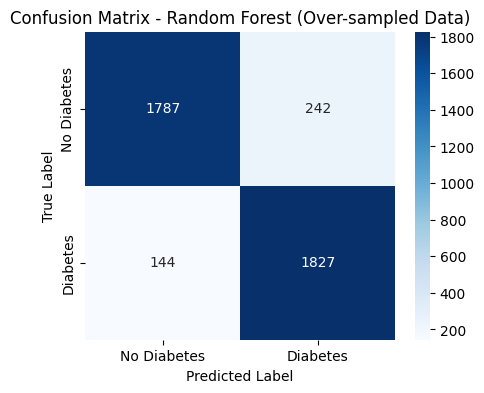


🔍 Gradient Boosting - Test Accuracy: 0.9130

              precision    recall  f1-score   support

           0       0.92      0.90      0.91      2029
           1       0.90      0.92      0.91      1971

    accuracy                           0.91      4000
   macro avg       0.91      0.91      0.91      4000
weighted avg       0.91      0.91      0.91      4000



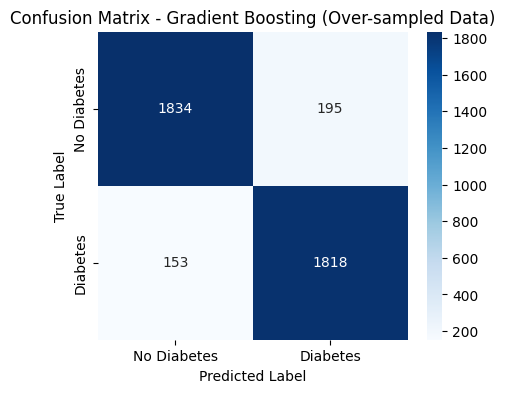


🔍 KNN - Test Accuracy: 0.8620

              precision    recall  f1-score   support

           0       0.91      0.81      0.86      2029
           1       0.82      0.92      0.87      1971

    accuracy                           0.86      4000
   macro avg       0.87      0.86      0.86      4000
weighted avg       0.87      0.86      0.86      4000



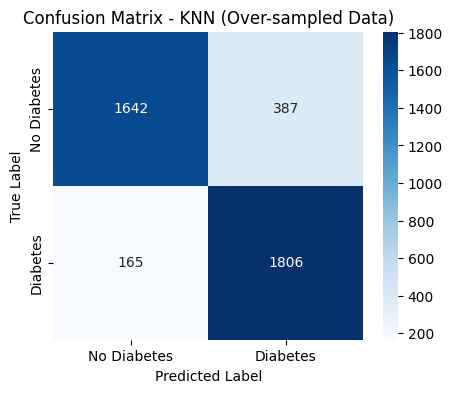

In [6]:
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
import seaborn as sns
import matplotlib.pyplot as plt



# Function to test and evaluate models
def evaluate_models(results, X_test, y_test, sampling_type):
    print(f"\n📌 Evaluating models on {sampling_type} test data...\n")
    test_results = {}

    for name, info in results.items():
        best_model = info["Best Model"]
        y_pred = best_model.predict(X_test)
        
        # Calculate accuracy
        test_acc = accuracy_score(y_test, y_pred)
        test_results[name] = test_acc
        
        print(f"\n🔍 {name} - Test Accuracy: {test_acc:.4f}\n")
        
        # Classification report
        print(classification_report(y_test, y_pred))
        
        # Confusion Matrix
        cm = confusion_matrix(y_test, y_pred)
        plt.figure(figsize=(5, 4))
        sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
                    xticklabels=['No Diabetes', 'Diabetes'],
                    yticklabels=['No Diabetes', 'Diabetes'])
        plt.title(f'Confusion Matrix - {name} ({sampling_type})')
        plt.xlabel('Predicted Label')
        plt.ylabel('True Label')
        plt.show()
    
    return test_results

# Evaluate on test data
test_results_raw = evaluate_models(results_raw, X_test_raw, y_test_raw, "Raw Data")
test_results_under = evaluate_models(results_under, X_test_under, y_test_under, "Under-sampled Data")
test_results_over = evaluate_models(results_over, X_test_over, y_test_over, "Over-sampled Data")


✅ Step 5: Compare Performance


📊 Model Accuracy Comparison:
                     Raw Data  Under-sampled  Over-sampled
Logistic Regression  0.860123       0.853896        0.8730
SVM                  0.860807       0.855519        0.8735
Random Forest        0.888851       0.884199        0.9035
Gradient Boosting    0.897401       0.891775        0.9130
KNN                  0.835841       0.817100        0.8620


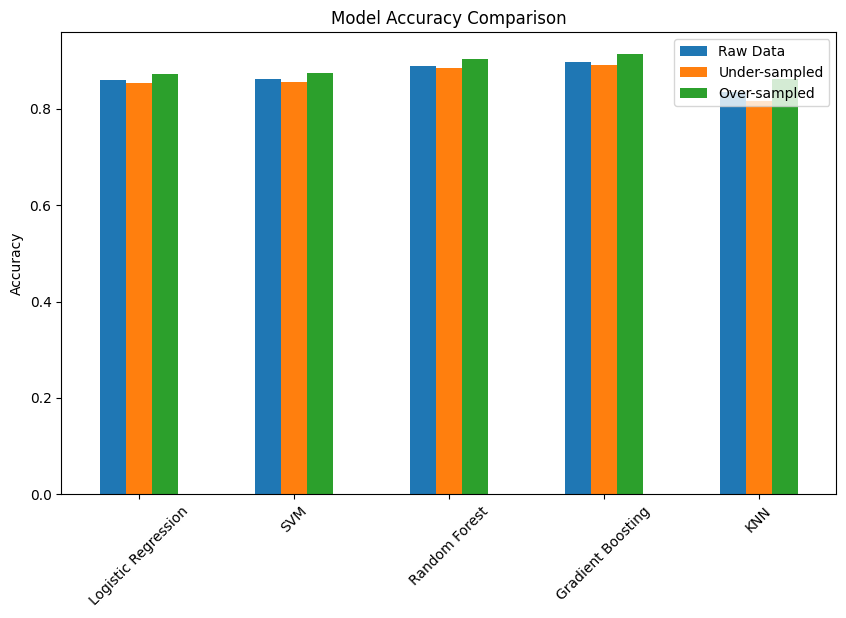

In [7]:
# Combine results
test_results_df = pd.DataFrame({
    "Raw Data": test_results_raw,
    "Under-sampled": test_results_under,
    "Over-sampled": test_results_over
})

print("\n📊 Model Accuracy Comparison:")
print(test_results_df)

# Plot results
test_results_df.plot(kind='bar', figsize=(10, 6))
plt.title("Model Accuracy Comparison")
plt.ylabel("Accuracy")
plt.xticks(rotation=45)
plt.show()
